In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [47]:
df = pd.read_csv('/kaggle/input/housing-dataset/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [49]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning 

In [50]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [51]:
df.shape

(545, 13)

# Data Exploration

Outlier analysis to check which value is differed using seaborn

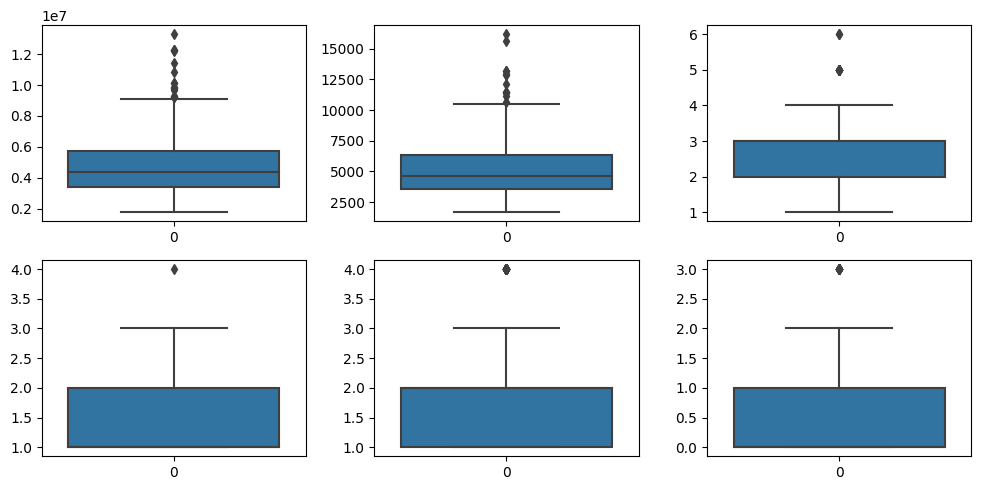

In [52]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

From the above figuers we can say that price and area have outlier values

We can drop these outlier values as the data is sufficient for analysing  

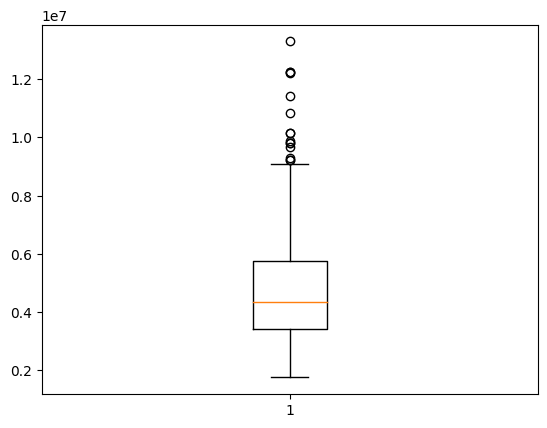

In [53]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
housing = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

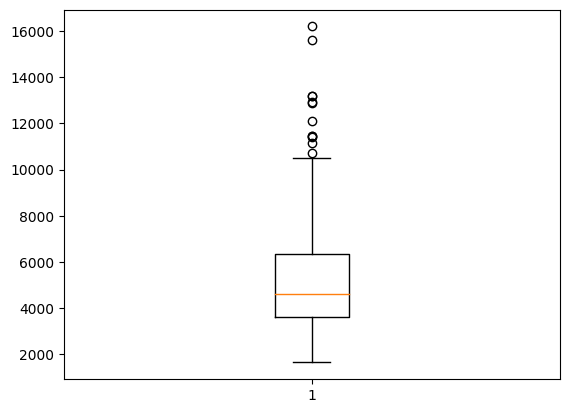

In [54]:
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
housing = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

# EDA

To show all the relations between the variables using seaborn 

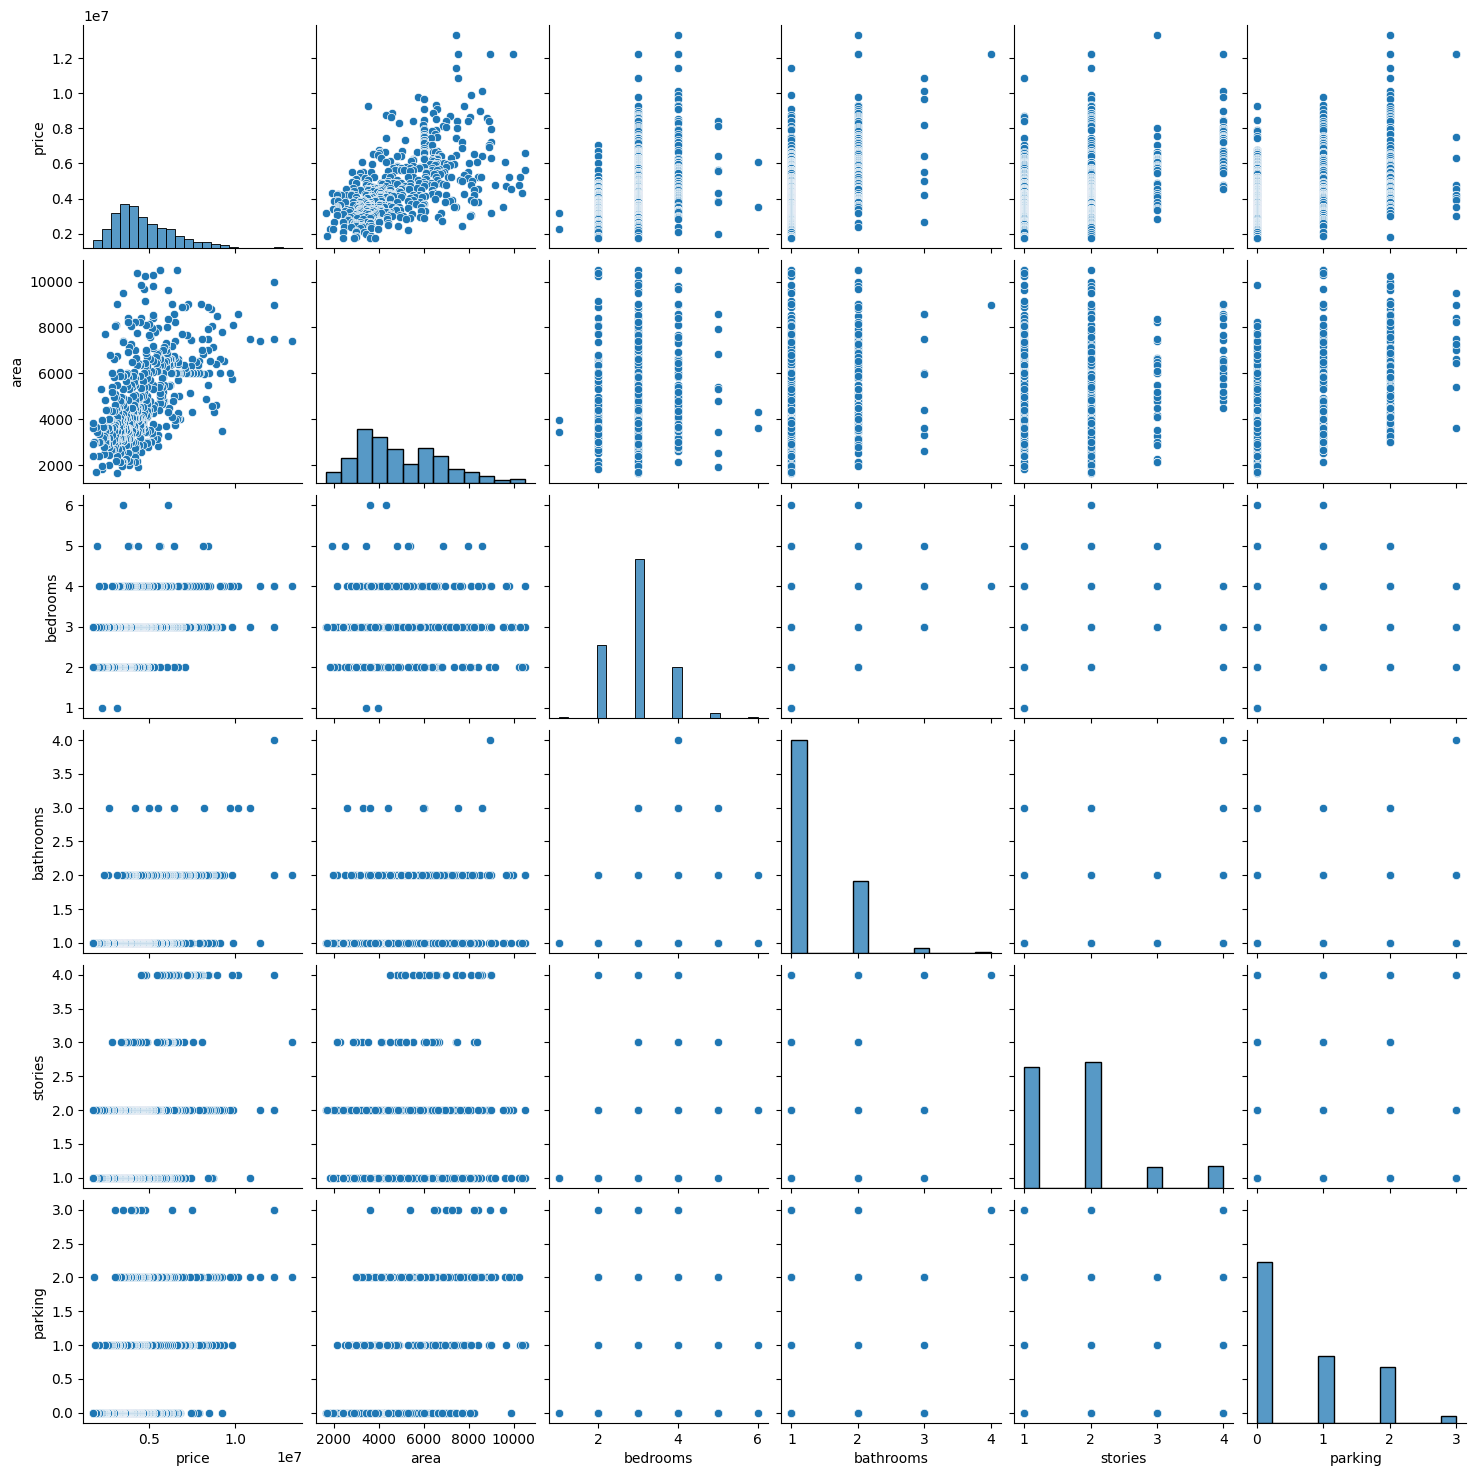

In [55]:
sns.pairplot(housing)
plt.show()

There are other categorical data as well in the dataset 


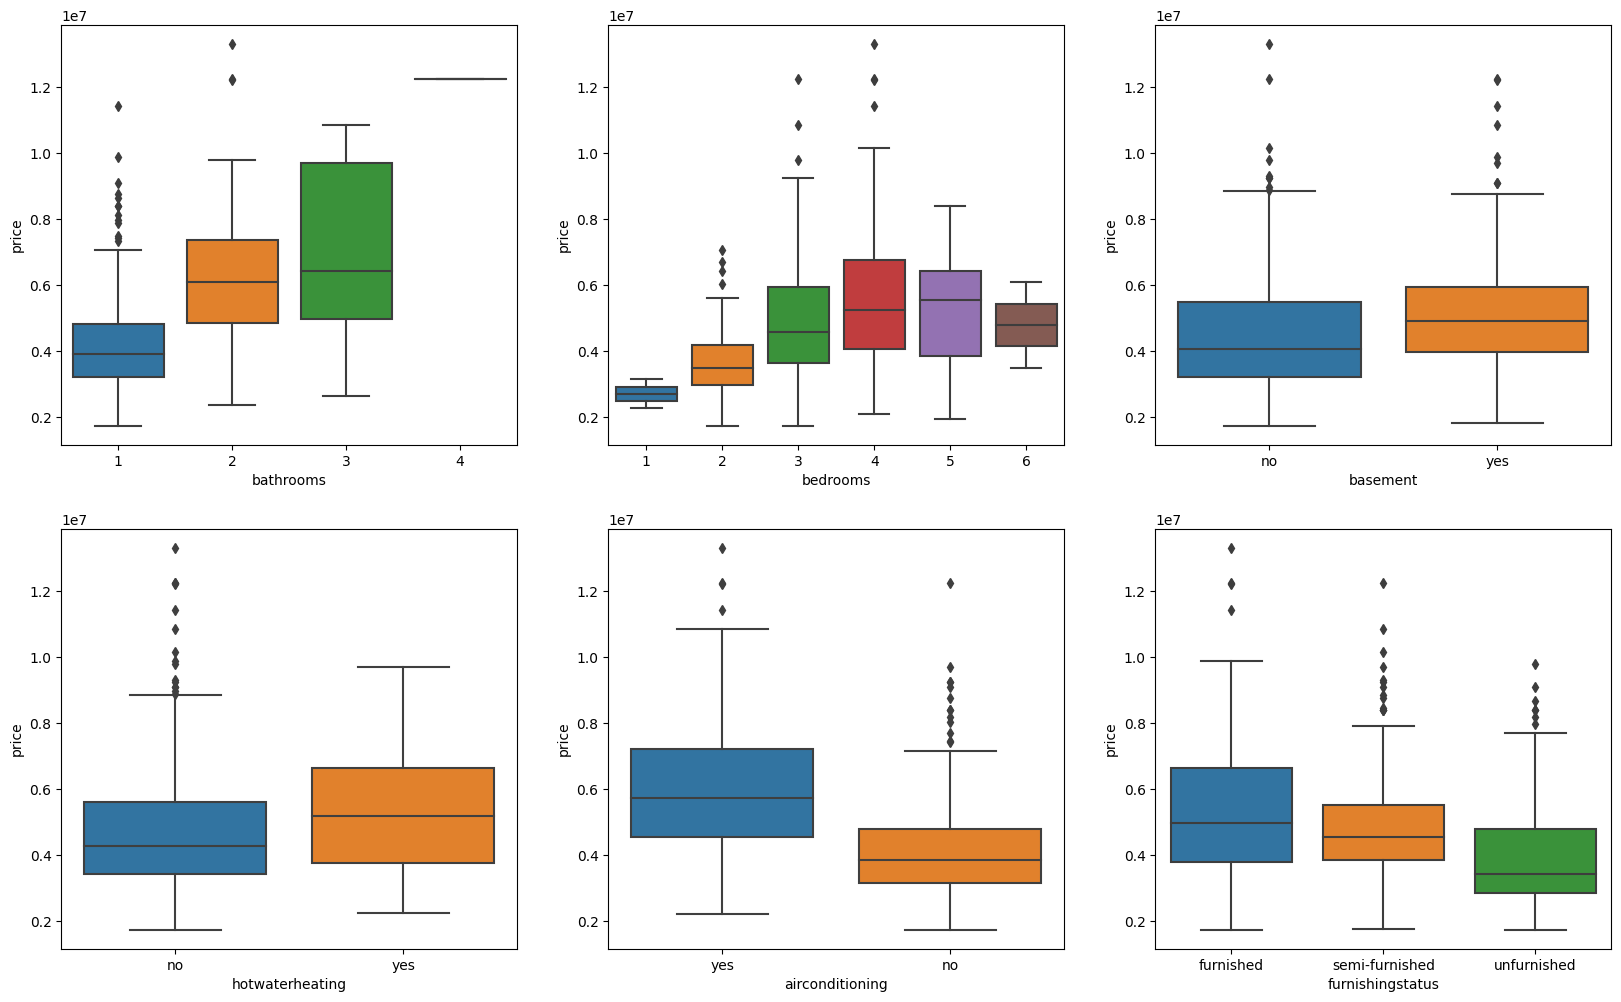

In [56]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'bathrooms', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'bedrooms', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

Using hue

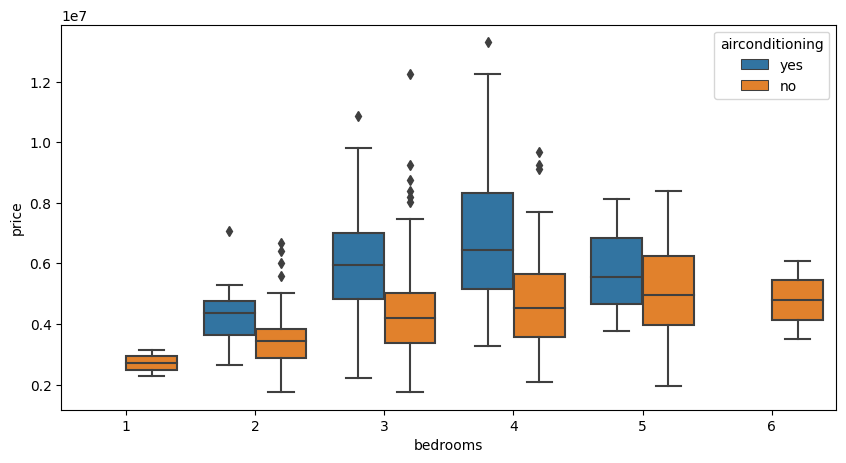

In [57]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'bedrooms', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

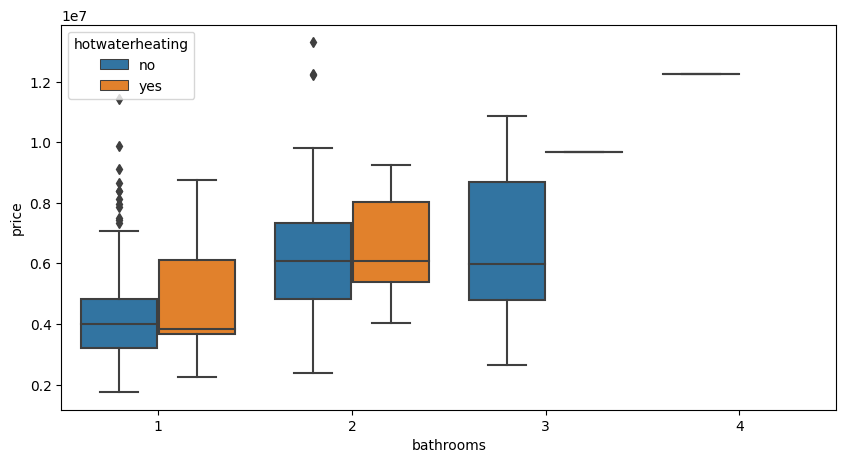

In [58]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'bathrooms', y = 'price', hue = 'hotwaterheating', data = housing)
plt.show()

Since there are many sub-categories and many of them contain yes/no as output we need to change the outputs in 1's and 0's


This method is used to represent regression line which requires numerical values instead of string type

In [59]:
oe=OrdinalEncoder()
l=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus']
for i in l:
    oe.fit(asarray(df[i]).reshape(-1,1))
    df[i]=oe.transform(asarray(df[i]).reshape(-1,1))

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 55.5 KB


In [61]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,2.0
541,1767150,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
542,1750000,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,2.0
543,1750000,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [62]:
df['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

In [63]:
cols=['area','price','bedrooms','bathrooms','stories','parking']
for col in cols:
    upper_limit=df[col].quantile(0.99)
    lower_limit=df[col].quantile(0.01)
    df[col]=np.where(df[col]>=upper_limit,
                    upper_limit,
                    df[col])

In [64]:
corr_matrix=df.corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.544695,0.375067,0.512730,0.425892,0.303137,0.266041,0.190360,0.098201,0.458383,0.379397,0.330472,-0.304749
area,0.544695,1.000000,0.153854,0.187975,0.089419,0.294850,0.148276,0.052138,-0.010577,0.227620,0.361341,0.245059,-0.178875
bedrooms,0.375067,0.153854,1.000000,0.379272,0.414607,-0.014299,0.084321,0.102742,0.047968,0.166864,0.142856,0.083217,-0.124946
bathrooms,0.512730,0.187975,0.379272,1.000000,0.322147,0.041591,0.130288,0.106522,0.069084,0.184532,0.170474,0.066579,-0.140707
stories,0.425892,0.089419,0.414607,0.322147,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.303137,0.294850,-0.014299,0.041591,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.266041,0.148276,0.084321,0.130288,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.190360,0.052138,0.102742,0.106522,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.098201,-0.010577,0.047968,0.069084,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.458383,0.227620,0.166864,0.184532,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [65]:
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
area                0.544695
bathrooms           0.512730
airconditioning     0.458383
stories             0.425892
parking             0.379397
bedrooms            0.375067
prefarea            0.330472
mainroad            0.303137
guestroom           0.266041
basement            0.190360
hotwaterheating     0.098201
furnishingstatus   -0.304749
Name: price, dtype: float64

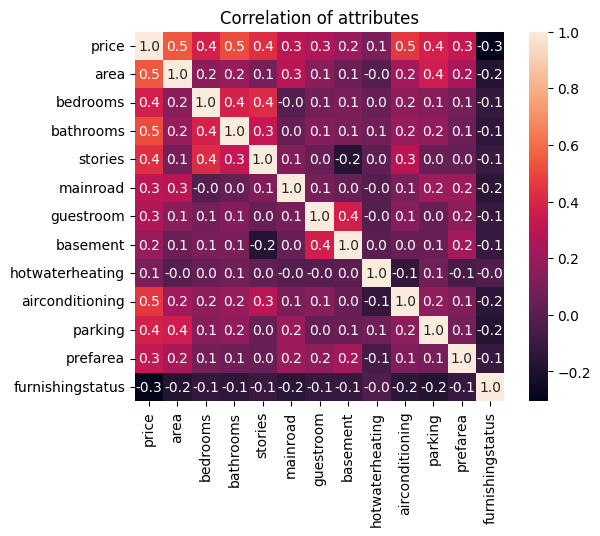

In [66]:
plt.title("Correlation of attributes")
a=sns.heatmap(corr_matrix,square=True, annot=True, fmt=".1f", linecolor='maroon')

In [67]:
df.drop('hotwaterheating', axis=1, inplace=True)

# Testing and Training

In [68]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [69]:
x



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0
1,8960.0,4.0,3.0,4.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0
2,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0
3,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0
4,7420.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0
541,2400.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,3620.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,2910.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
y

0      10542000.0
1      10542000.0
2      10542000.0
3      10542000.0
4      10542000.0
          ...    
540     1820000.0
541     1767150.0
542     1750000.0
543     1750000.0
544     1750000.0
Name: price, Length: 545, dtype: float64

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(381, 11) (164, 11) (381,) (164,)


In [72]:
ridge = Ridge(alpha=1.0) 
ridge.fit(xtrain,ytrain)
ridge_predictions = ridge.predict(xtest)

ridge_predictions

array([2807413.87236319, 3783047.16142756, 6056402.11570307,
       3963696.10730264, 6684174.97790978, 6959504.77380584,
       3733437.75930142, 3230665.41304749, 5344175.50352842,
       3141244.58489318, 5026210.03820942, 2298372.39092591,
       4178026.4334418 , 4521925.70797065, 6592410.49257751,
       2769495.92343565, 7330214.00291882, 6278168.89936756,
       5233077.61510475, 4433021.90145863, 2710737.34810249,
       2116196.02775165, 6024020.46599707, 5374355.22452917,
       6659615.38632097, 6004004.84906789, 3746526.70147947,
       3850350.80220888, 3594991.54373854, 3877992.98867491,
       4416176.70467321, 5131290.52694275, 5635850.34282338,
       5533045.9411851 , 7491049.68738841, 5238963.36255482,
       6547154.66699131, 2474396.0313291 , 5331437.93590852,
       5438452.13403117, 4968373.75881686, 5433421.68779534,
       3032576.91151932, 6329163.59746412, 5832477.44113516,
       7744002.71594146, 7609258.78011135, 5945566.49513612,
       3577060.3974055 ,

In [73]:
r2=r2_score(ytest,ridge_predictions)
print(r2)

0.7292703771240905


In [74]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypre=model.predict(xtest)

In [75]:
ypre

array([2795205.77850866, 3779374.15400345, 6059346.96579593,
       3954471.1935769 , 6680881.87127795, 6967594.05493154,
       3724423.95746889, 3218052.39532781, 5353875.4451857 ,
       3140569.53805483, 5026435.23953127, 2287881.01734091,
       4186996.85772809, 4525516.69503918, 6598711.50490493,
       2758843.64986015, 7333767.94052422, 6285373.3465763 ,
       5236358.70977507, 4420595.29071297, 2709355.41958785,
       2107064.14019994, 6008571.45928546, 5377763.72937229,
       6667033.70359817, 6014507.82345708, 3742648.2123567 ,
       3843121.33063927, 3599664.69527102, 3876548.60184183,
       4423670.57283699, 5137916.05827504, 5627192.57441136,
       5534260.72710433, 7497215.98098911, 5233098.62656376,
       6559412.19256459, 2463192.35351257, 5331154.31877888,
       5453740.67062395, 4974898.6728783 , 5420552.61942393,
       3030875.25183143, 6350341.96550214, 5842965.49549381,
       7749777.16353165, 7602478.01777189, 5955819.12614059,
       3584320.30494002,

In [76]:
model.coef_

array([ 2.49402589e+02,  1.75388174e+05,  8.45493157e+05,  4.52896843e+05,
        4.22721415e+05,  2.49292054e+05,  4.54111285e+05,  8.31489301e+05,
        3.10615452e+05,  5.93778939e+05, -2.04251379e+05])

In [77]:
model.score(xtest,ytest)

0.7292983746958296

In [78]:
from sklearn.metrics import r2_score
r2=r2_score(ytest,ypre)
print(r2)

0.7292983746958296


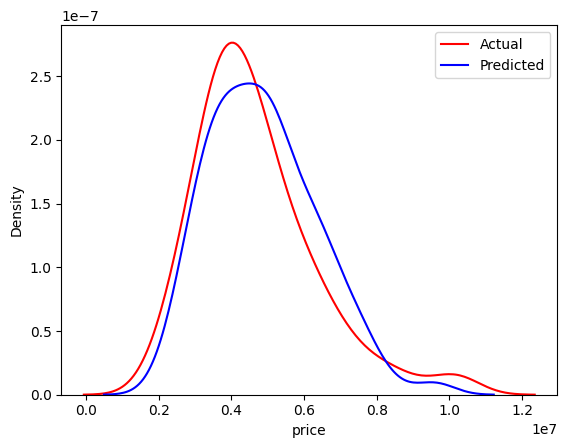

In [79]:
sns.distplot(ytest, hist=False, color='red', label='Actual')
# Overlay a distribution plot of the predicted values in blue
sns.distplot(ypre, hist=False, color='blue', label='Predicted')
# Display the legend
plt.legend()
# Show the plot
plt.show()

# 

In [80]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit(xtrain)
xtrain.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,5054.627822,2.979003,1.301837,1.821522,0.868766,0.167979,0.338583,0.309711,0.650919,0.217848,1.070866
std,2002.202222,0.732393,0.503380,0.873383,0.338100,0.374339,0.473850,0.462983,0.834412,0.413326,0.766205
min,1700.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6240.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000
max,12543.600000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [81]:
xtrain_minmax=minmax.transform(xtrain)
type(xtrain_minmax)

numpy.ndarray

In [82]:
xtrain_minmax=pd.DataFrame(xtrain_minmax,columns=xtrain.columns)
xtrain_minmax.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.309365,0.494751,0.150919,0.273841,0.868766,0.167979,0.338583,0.309711,0.216973,0.217848,0.535433
std,0.184644,0.183098,0.251690,0.291128,0.338100,0.374339,0.473850,0.462983,0.278137,0.413326,0.383102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.175219,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.258217,0.500000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.418680,0.500000,0.500000,0.333333,1.000000,0.000000,1.000000,1.000000,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
xtest_minmax=minmax.transform(xtest)
xtest_minmax=pd.DataFrame(xtest_minmax,columns=xtest.columns)
xtest_minmax.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.333820,0.480183,0.121951,0.256098,0.835366,0.20122,0.378049,0.329268,0.264228,0.274390,0.533537
std,0.213875,0.177285,0.235773,0.285045,0.371986,0.40214,0.486385,0.471387,0.305540,0.447573,0.376173
min,-0.004611,0.250000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173374,0.250000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.375000
50%,0.286575,0.500000,0.000000,0.333333,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.451879,0.500000,0.000000,0.333333,1.000000,0.00000,1.000000,1.000000,0.666667,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
xtrain_minmax

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,0.746984,0.75,0.5,0.333333,1.0,1.0,0.0,0.0,0.666667,0.0,0.5
1,0.446346,0.75,0.5,0.333333,1.0,1.0,1.0,1.0,0.666667,1.0,0.0
2,0.167841,0.25,0.0,0.333333,1.0,0.0,0.0,0.0,0.000000,1.0,0.0
3,0.604043,0.50,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.136486,0.75,0.0,0.333333,1.0,0.0,1.0,1.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
376,0.175219,0.25,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
377,0.241617,0.50,0.0,0.333333,1.0,0.0,0.0,0.0,0.666667,1.0,0.0
378,0.012542,0.25,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.5
379,1.000000,0.50,0.0,0.000000,1.0,0.0,0.0,1.0,0.666667,0.0,0.5


In [85]:
xtest_minmax

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,0.133719,0.50,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
1,0.215795,0.25,0.0,0.333333,1.0,0.0,0.0,0.0,0.333333,0.0,0.5
2,0.258217,0.75,0.5,0.333333,1.0,0.0,1.0,0.0,0.666667,0.0,0.0
3,0.341215,0.75,0.0,0.333333,1.0,0.0,0.0,0.0,0.000000,0.0,1.0
4,0.396547,0.75,0.5,1.000000,1.0,0.0,0.0,0.0,0.666667,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
159,0.396547,0.50,0.5,1.000000,1.0,1.0,1.0,1.0,0.000000,1.0,0.5
160,0.158619,0.75,0.5,0.333333,1.0,0.0,1.0,1.0,0.666667,0.0,0.5
161,0.043805,0.50,0.0,0.333333,0.0,1.0,1.0,1.0,0.000000,0.0,1.0
162,0.320004,0.50,0.0,1.000000,1.0,0.0,0.0,1.0,0.000000,0.0,0.5


In [86]:
model1=LinearRegression()
model1.fit(xtrain_minmax,ytrain)
ypre1=model1.predict(xtest_minmax)

In [87]:
print(r2_score(ytest,ypre1))

0.7292983746958301


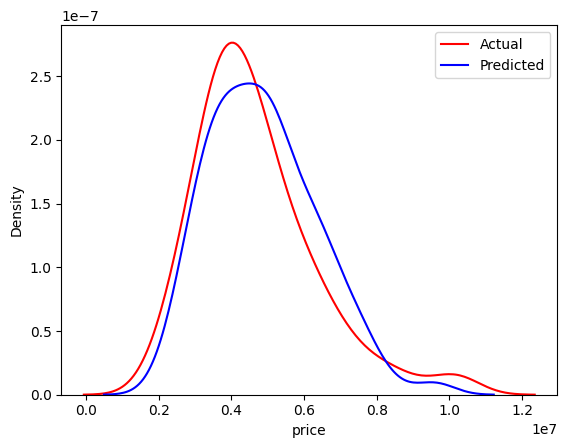

In [88]:
sns.distplot(ytest, hist=False, color='red', label='Actual')
# Overlay a distribution plot of the predicted values in blue
sns.distplot(ypre1, hist=False, color='blue', label='Predicted')
# Display the legend
plt.legend()
# Show the plot
plt.show()

> Conclusion

* Linear Regression for Predicting house prices
* r2_score : 0.7292983746958296
* The model has an R-squared (R²) value of 0.729, which indicates that approximately 72.9% of the variability in the house prices can be explained by the model. 